<center>Universidade Federal de Viçosa</center>
<center>Coordenadoria de Educação Aberta e a Distância</center>
<center>Inteligência Artificial e Computacional</center>
<center>ELT578 - Análise de Imagens e Visão Computacional</center>
<center>TURMA 2023/1</center>

**<center>AULA PRÁTICA 2: Técnicas de Realce</center>**

In [22]:
#Permissão para acessar o drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


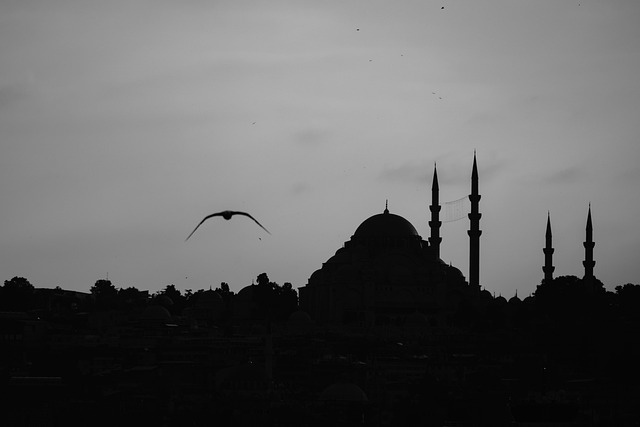

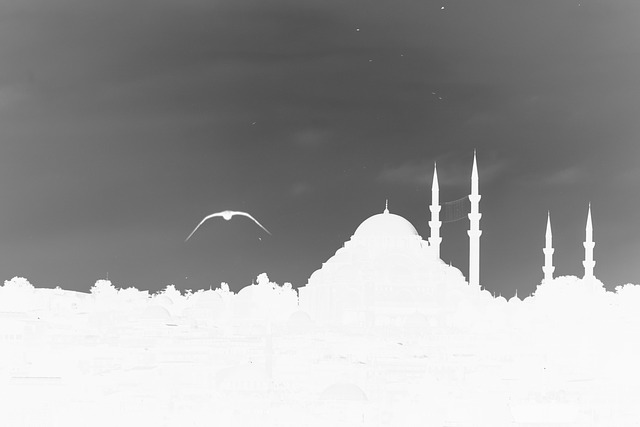

In [23]:
#Importando bibliotecas
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

Im=Ie = cv2.imread('/content/drive/MyDrive/ELT578/SEMANA_2/istanbul.jpg',0)
cv2_imshow(np.uint8(Im))

#Negativo da Imagem
neg = cv2.subtract(255,Im)

cv2_imshow(neg)

196


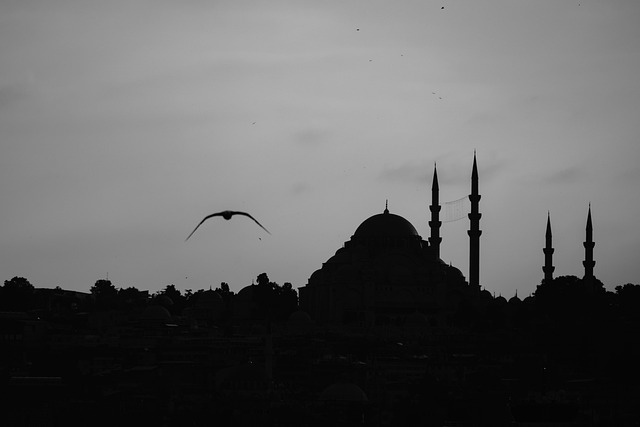

float16
5.285
0.0
float16
255.0
0.0
uint8
255
0


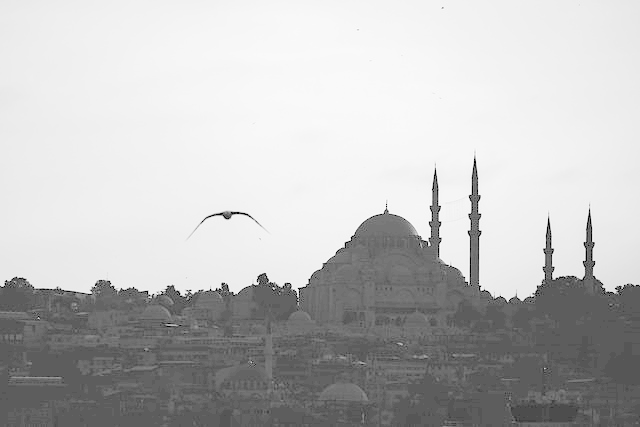

In [26]:
#Transformação Logarítmica
#realcar a parte escura
Ie = cv2.imread('/content/drive/MyDrive/ELT578/SEMANA_2/istanbul.jpg',0)
print (Im.max())
cv2_imshow(Ie)

Is = np.log(cv2.add(Ie,1))
print (Is.dtype)
print (Is.max())
print (Is.min())

Is= (Is-Is.min())/(Is.max()-Is.min())*255
print (Is.dtype)
print (Is.max())
print (Is.min())

Is = np.uint8(Is)
print (Is.dtype)
print (Is.max())
print (Is.min())

cv2_imshow(Is)

255
0


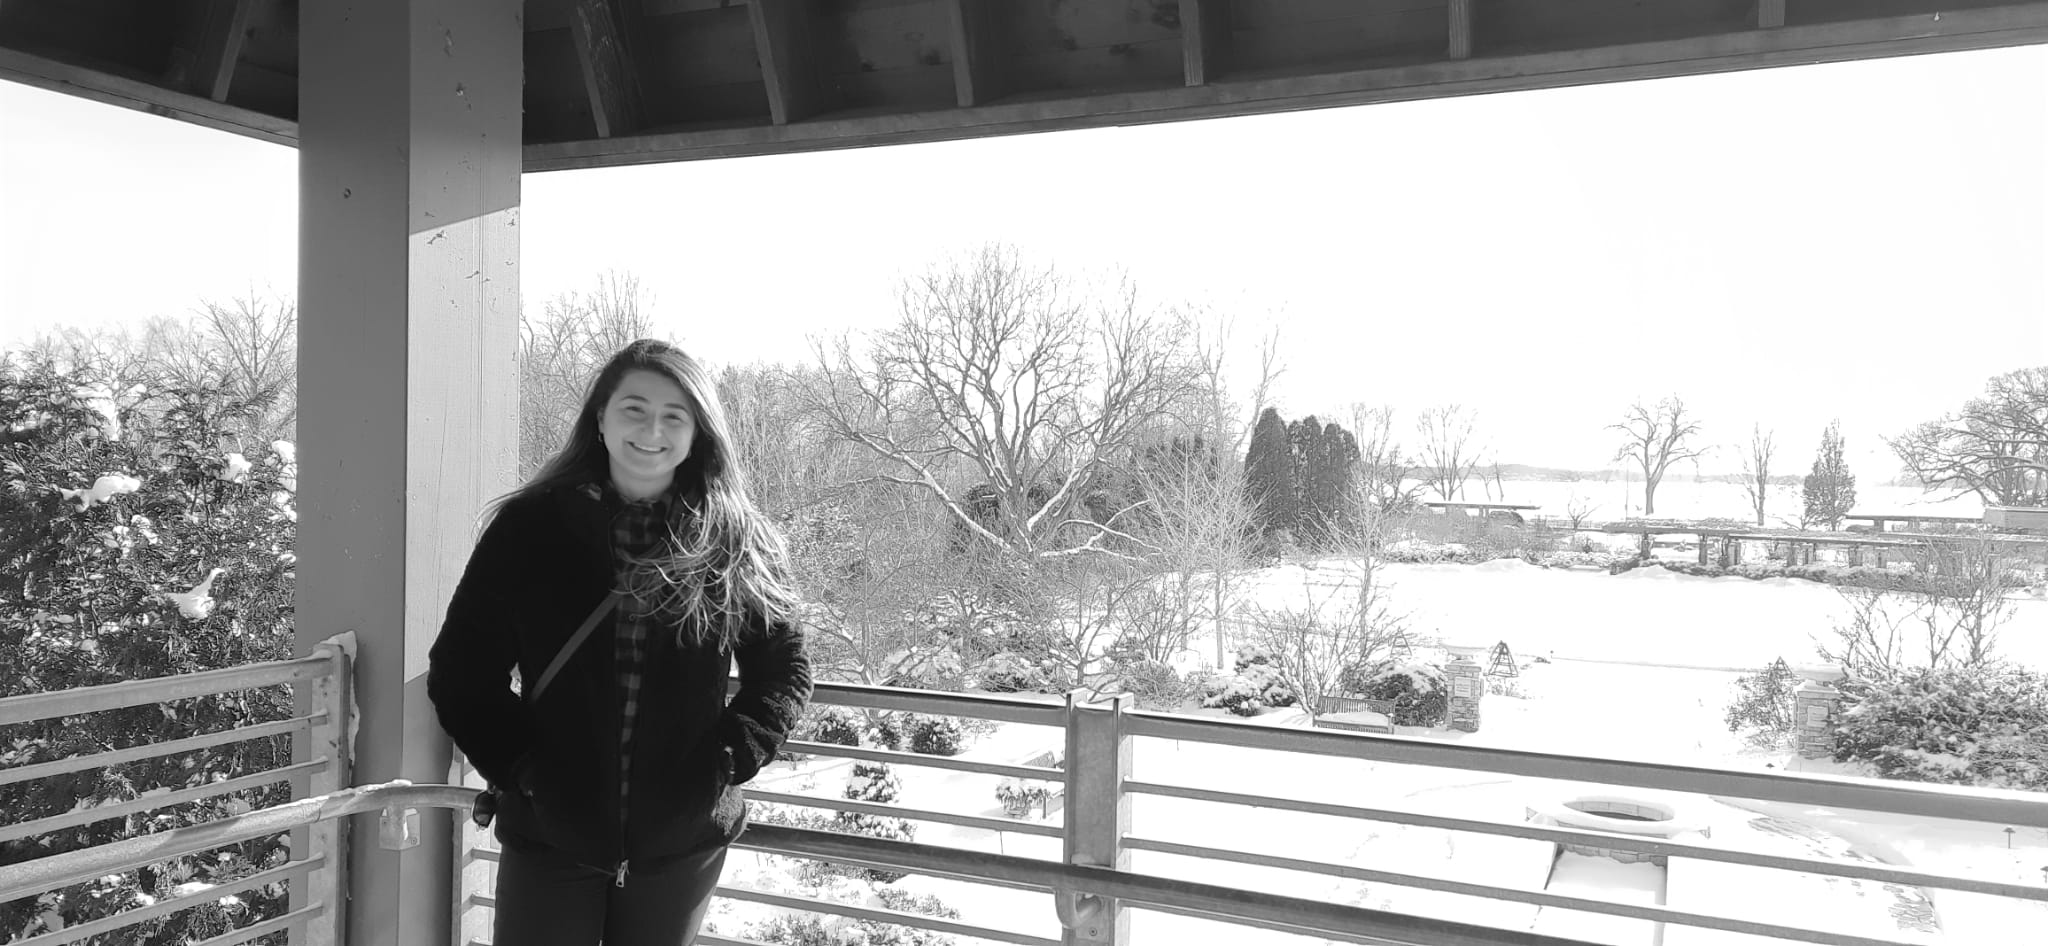

154.97097941077837
0.0
float64
255.0
0.0
uint8
255
0


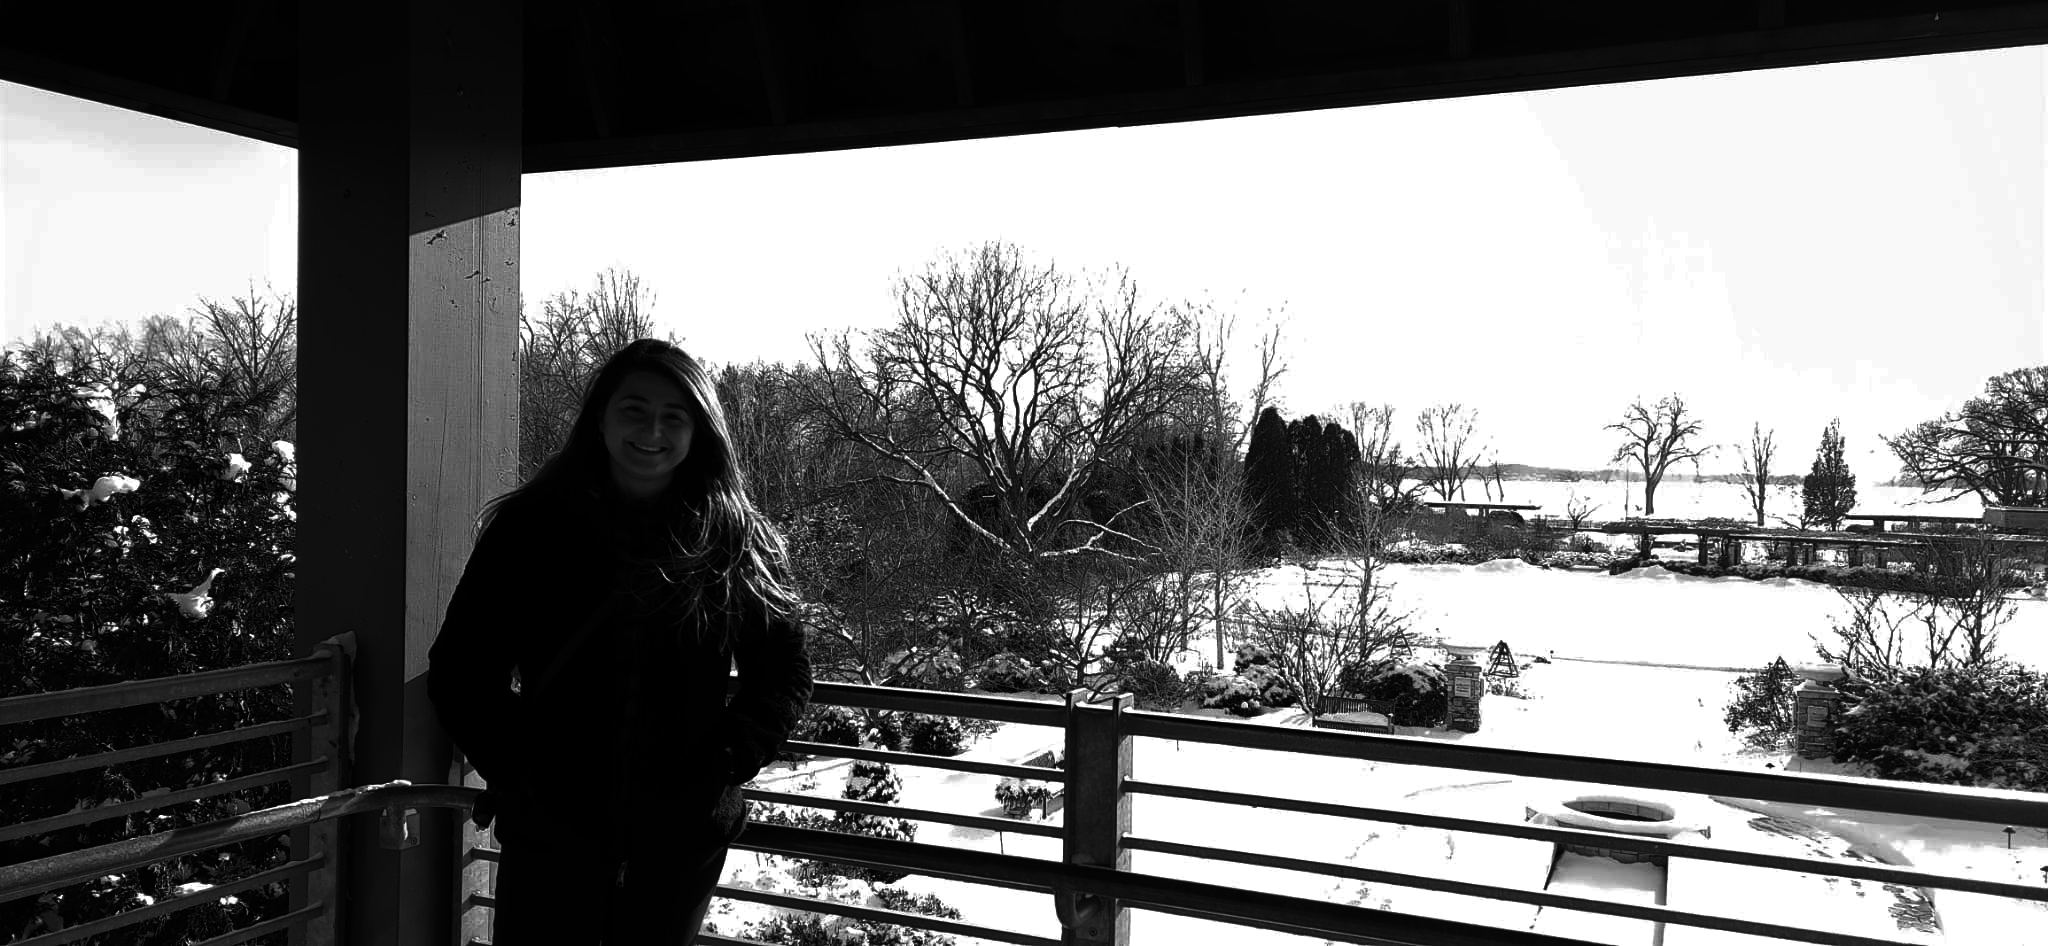

In [29]:
#Transformação Exponencial
#realcar a parte clara
Ie = cv2.imread('/content/drive/MyDrive/ELT578/SEMANA_2/lake_monona.jpeg',0)
print (np.max(Ie))
print (np.min(Ie))

cv2_imshow(Ie)

b=1.02

Is = np.power(b,Ie)-1
print (Is.max())
print (Is.min())

Is = Is*255/Is.max()
print (Is.dtype)
print (Is.max())
print (Is.min())

Is = np.uint8(Is)
print (Is.dtype)
print (Is.max())
print (Is.min())

cv2_imshow(Is)

30
0
255
uint8


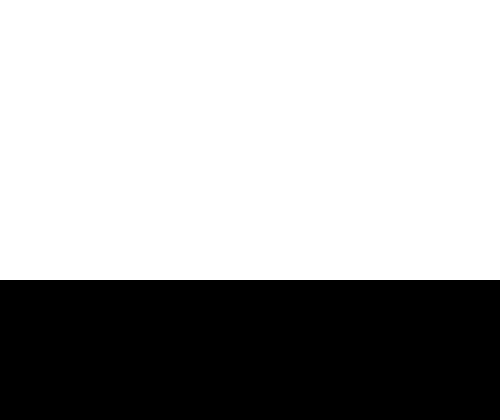

In [36]:
#Limiarização

Im = cv2.imread('/content/drive/MyDrive/ELT578/SEMANA_2/PC.jpg',0)

#k = np.mean(Im)
k=30
print (k)

Im_thr = Im.copy()
Im_thr[Im > k]=255
Im_thr[Im <= k]=0

print (Im_thr.min())
print (Im_thr.max())
print (Im_thr.dtype)

cv2_imshow(Im_thr)

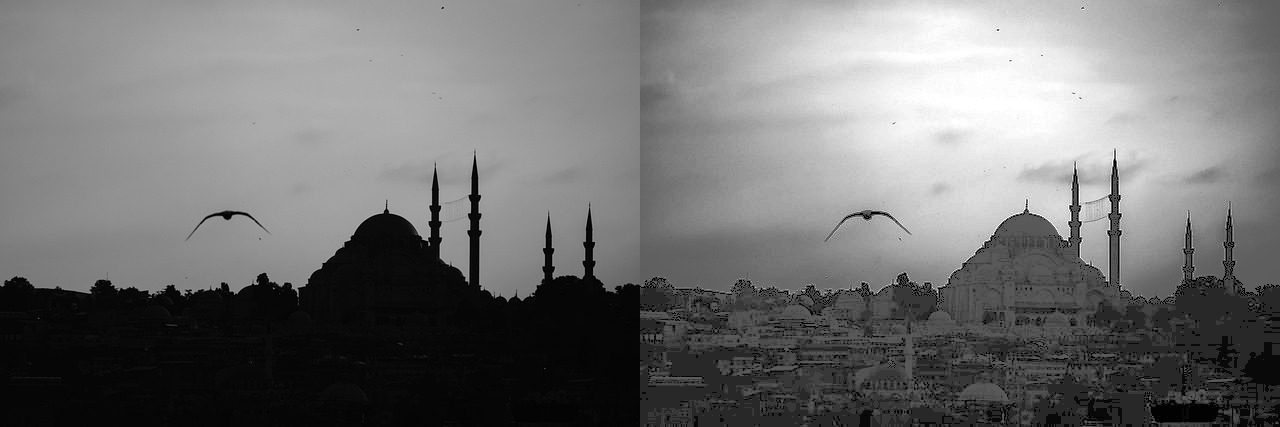

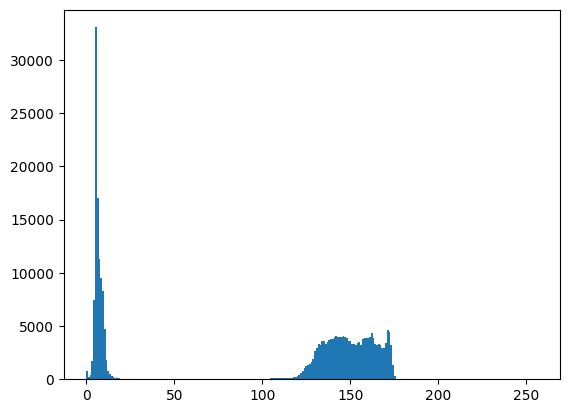

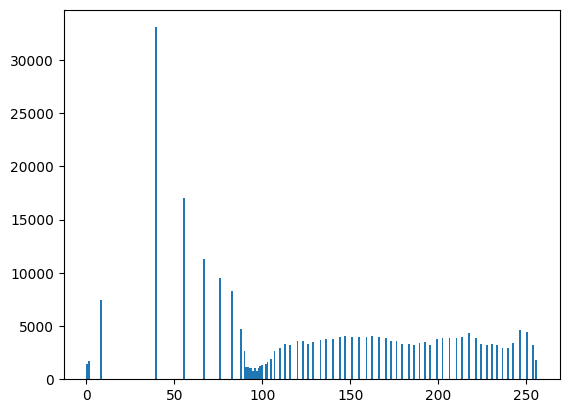

In [37]:
#EQUALIZAÇÃO - Processamento preto e branco

from matplotlib import pyplot as plt

Im = cv2.imread('/content/drive/MyDrive/ELT578/SEMANA_2/istanbul.jpg',0)
#cv2_imshow(Im)

Im_eq=cv2.equalizeHist(Im) #Equalização - melhora o contraste

resul=np.hstack((Im,Im_eq))

cv2_imshow(resul)

cv2.imwrite('Equalizacao.png',Im_eq)

plt.hist(Im.ravel(), 255,[0,256])
plt.show()

plt.hist(Im_eq.ravel(), 255,[0,256])
plt.show()

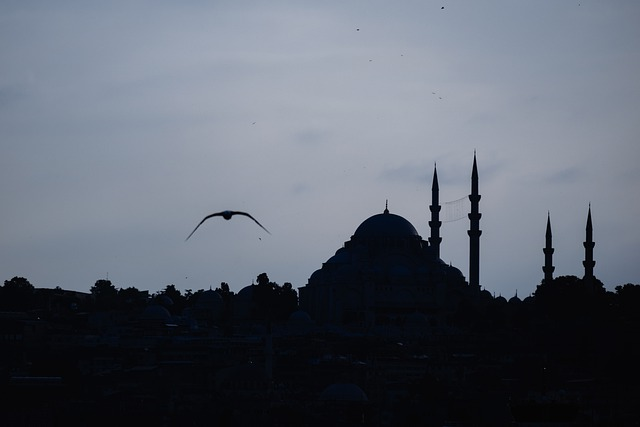

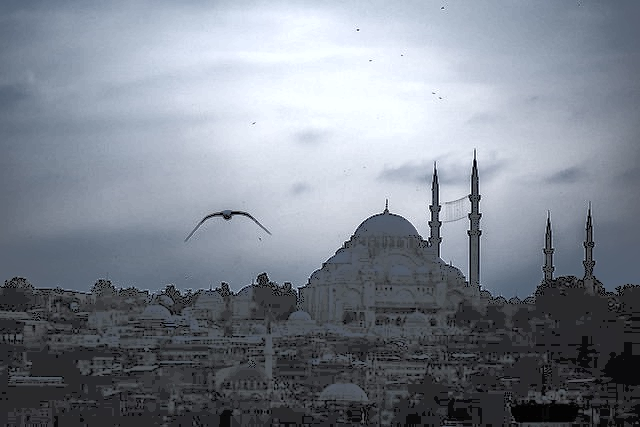

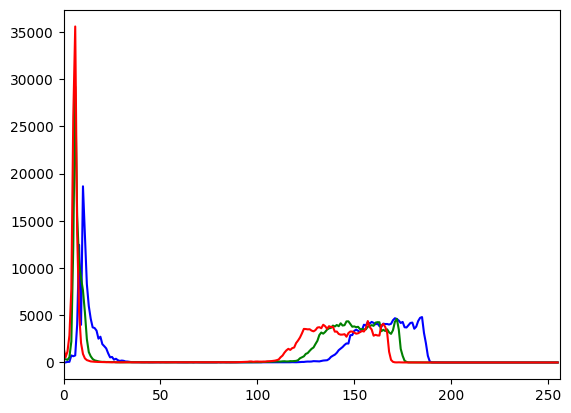

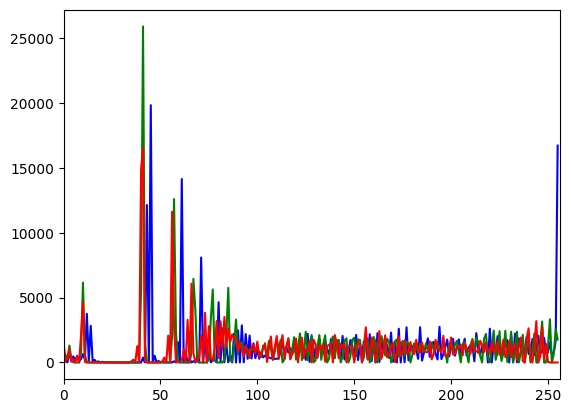

In [38]:
#EQUALIZAÇÃO - Processamento RGB

#Explicação
#OpenCV carrega imagens coloridas no espaço de cores BGR. Com este espaço de cores, não é possível equalizar o histograma sem afetar as informações de cores porque
#todos os 3 canais contêm informações de cores. Portanto, você deve converter a imagem BGR em um espaço de cores como YCrCb. No espaço de cores YCrCb, o canal Y da imagem contém apenas
#informações de intensidade, enquanto os canais Cr e Cb contêm todas as informações de cores da imagem. Portanto, apenas o canal Y deve ser processado para obter uma imagem equalizada do histograma
#sem alterar nenhuma informação de cor. Após o processamento, a imagem YCrCb deve ser convertida para o espaço de cores BGR antes de chamar a função imshow ().

from matplotlib import pyplot as plt

img = cv2.imread('/content/drive/MyDrive/ELT578/SEMANA_2/istanbul.jpg')
img_yuv = cv2.cvtColor(img, cv2.COLOR_BGR2YUV) #YUV

# equalize the histogram of the Y channel
img_yuv[:,:,0] = cv2.equalizeHist(img_yuv[:,:,0])

# convert the YUV image back to RGB format
img_output = cv2.cvtColor(img_yuv, cv2.COLOR_YUV2BGR)

cv2_imshow(img)
cv2_imshow(img_output)
cv2.imwrite('/content/drive/MyDrive/ELT578/SEMANA_2/Equalizacao_RBG.jpg', img_output, [int(cv2.IMWRITE_JPEG_QUALITY), 100])

color = ('b','g','r')

for i,col in enumerate(color):
    histr1 = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr1,color = col)
    plt.xlim([0,256])
plt.show()


for i,col in enumerate(color):
    histr2 = cv2.calcHist([img_output],[i],None,[256],[0,256])
    plt.plot(histr2,color = col)
    plt.xlim([0,256])
plt.show()


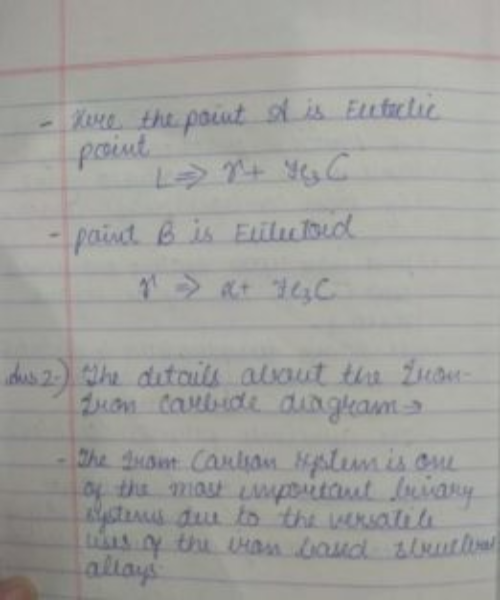

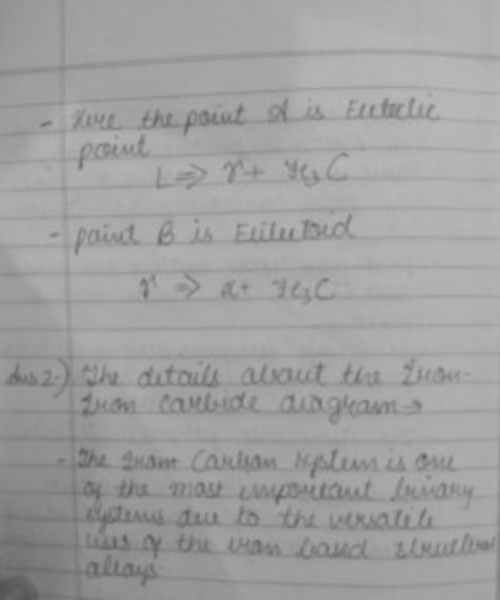

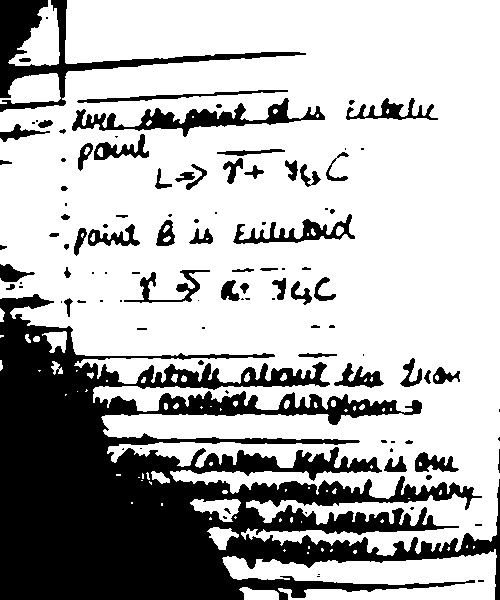

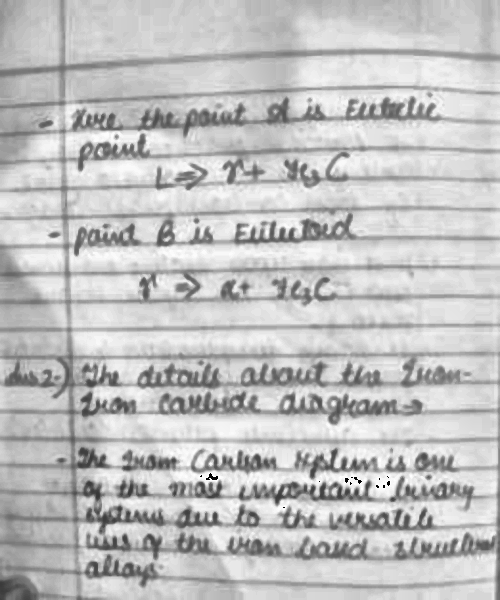

In [42]:
#CLAHE (Contrast Limited Adaptive Histogram Equalization)
#Parameters :
#When applying CLAHE, there are two parameters to be remembered:
#clipLimit – This parameter sets the threshold for contrast limiting. The default value is 40.
#tileGridSize – This sets the number of tiles in the row and column. By default this is 8×8. It is used while the image is divided into tiles for applying CLAHE.

import cv2
import numpy as np

# Reading the image from the present directory
image = cv2.imread('/content/drive/MyDrive/ELT578/SEMANA_2/image.jpg')
# Resizing the image for compatibility
image = cv2.resize(image, (500, 600))
cv2_imshow(image)

# The initial processing of the image
image = cv2.medianBlur(image, 3)
image_bw = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2_imshow(image_bw)

# The declaration of CLAHE
# clipLimit -> Threshold for contrast limiting
clahe = cv2.createCLAHE(clipLimit=5)
final_img = clahe.apply(image_bw) + 30

# Ordinary thresholding the same image
_, ordinary_img = cv2.threshold(image_bw, 155, 255, cv2.THRESH_BINARY)

# Showing the two images
cv2_imshow(ordinary_img)
cv2_imshow(final_img)